In [51]:
import pandas as pd
from matplotlib import pyplot as plt

Reading the raw dataset.

In [52]:
df = pd.read_csv(open("../raw/qbias.csv"), encoding="utf-8")
df

,Unnamed: 0,title,tags,heading,source,text,bias_rating
0,0,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Chicago Gun Violence Spikes and Increasingly F...,New York Times (News),As Yasmin Miller drove home from a laundromat ...,left
1,1,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",‘Bullets just came from nowhere’: Fourth of Ju...,Chicago Tribune,As many Chicagoans were celebrating the Fourth...,center
2,2,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Dozens of shootings across US mark bloody July...,New York Post (News),The nation’s 4th of July weekend was marred by...,right
3,3,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Federal Government Will Run Out of Cash on Oct...,The Epoch Times,Treasury Secretary Janet Yellen on Tuesday war...,right
4,4,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Yellen tells Congress that U.S. will run out o...,Washington Post,Treasury Secretary Janet Yellen on Tuesday tol...,left
...,...,...,...,...,...,...,...
21749,21749,Biden Seeks $30 Billion For Disaster Aid And R...,"['Disaster', 'Joe Biden', 'Disaster Aid', 'Afg...",White House asks Congress to pass emergency fu...,Washington Post,The White House budget office Tuesday sent Con...,left
21750,21750,Biden Seeks $30 Billion For Disaster Aid And R...,"['Disaster', 'Joe Biden', 'Disaster Aid', 'Afg...","Biden wants $30B for disaster aid, Afghan rese...",Washington Examiner,The White House budget office on Tuesday urged...,right
21751,21751,US House Condemns QAnon Group,"['US House', 'QAnon', 'Free Speech', 'Politics']",Seventeen Republican congressmen and Justin Am...,Washington Examiner,The House passed a resolution condemning the c...,right
21752,21752,US House Condemns QAnon Group,"['US House', 'QAnon', 'Free Speech', 'Politics']",Why did some Republicans balk at a resolution ...,NBC News (Online),As many Americans came to realize in recent mo...,left


Dropping useless columns.

In [53]:
df = df.drop(columns=["Unnamed: 0", "tags", "heading", "source"])

Renaming columns.

In [54]:
df = df.rename(columns={"text": "body", "bias_rating": "leaning"})

Categorizing the leaning column.

In [55]:
df["leaning"] = df["leaning"].astype("category")

Dropping rows with missing data.

In [56]:
df = df.dropna()

Printing duplicates.

In [57]:
df[df["body"].duplicated(keep=False)]

,title,body,leaning
404,Secretary of Defense James Mattis Resigns,"Defense Secretary James Mattis, the last of a ...",right
406,Secretary of Defense James Mattis Resigns,"Defense Secretary James Mattis, the last of a ...",left
1994,Obama Will Leave Troops in Afghanistan,"President Barack Obama will keep 5,500 U.S. tr...",right
1996,Obama Will Leave Troops in Afghanistan,"President Barack Obama will keep 5,500 U.S. tr...",left
3624,Back on the Campaign Trail,President Barack Obama dives back into campaig...,left
3625,Back on the Campaign Trail,President Barack Obama dives back into campaig...,right
4768,Second Year of Enrollments,The second sign-up season under President Bara...,left
5712,Wisconsin in Play,Wisconsin Republicans seem to have it all. Nat...,right
5714,Wisconsin in Play,Wisconsin Republicans seem to have it all. Nat...,left
5949,House Approves Keystone,The second sign-up season under President Bara...,center


Dropping the duplicates.

In [58]:
df = df.drop_duplicates(subset="body")

Inspecting body length.

In [59]:
df["body_length"] = df["body"].str.len()
df["body_word_count"] = df["body"].str.split().str.len()
df = df.sort_values(by="body_length")
df.head()

,title,body,leaning,body_length,body_word_count
14767,Happy 4th of July,Video,left,5,1
3437,Benghazi Emails Raise Questions,Cover up.,right,9,2
17088,Mueller Says Trump is Currently Not Criminal T...,Game over?,right,10,2
10771,Nancy Pelosi Gives 8 Hour Speech on House Floor,She persisted.,left,14,2
16345,Trump’s Speech on Islam,What could go wrong?,left,20,4


After inspection, articles with bodies shorter than 4 words seem to contain no political value. Removing them.

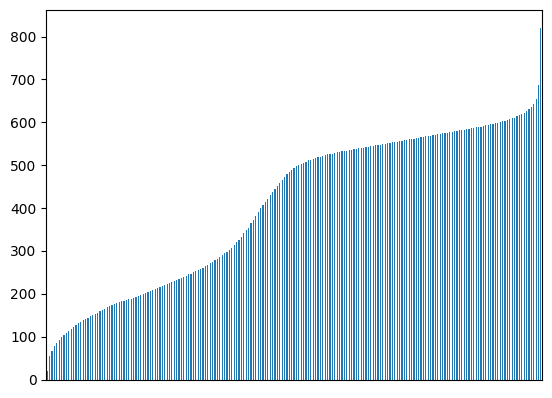

In [60]:
body_word_count_lower_bound = 4
df = df[df["body_word_count"] >= body_word_count_lower_bound]
# Ensuring to include the last (longest) item.
downsampled = pd.concat([df["body_length"].iloc[::100], df["body_length"].tail(1)]).drop_duplicates()
downsampled.plot.bar().xaxis.set_ticks([]);

In [61]:
df["body_length"].mean()

np.float64(413.64356435643566)

The leaning distribution.

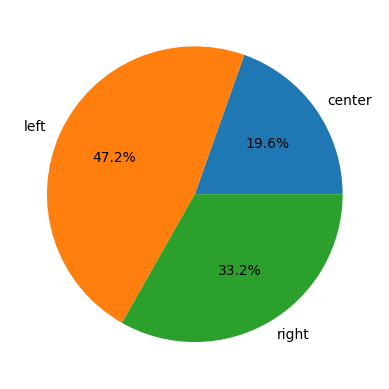

In [62]:
df.groupby("leaning", observed=True).size().plot.pie(autopct="%1.1f%%");

The distribution of body length sums per leaning.

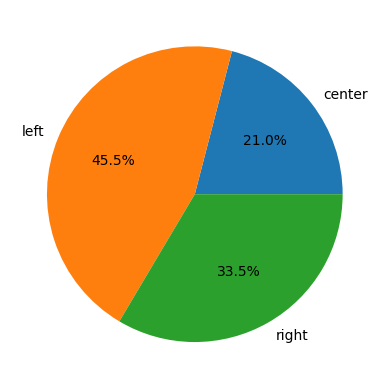

In [63]:
df.groupby("leaning", observed=True)["body_length"].sum().plot.pie(autopct="%1.1f%%", ylabel="");

Body length distribution by leaning.

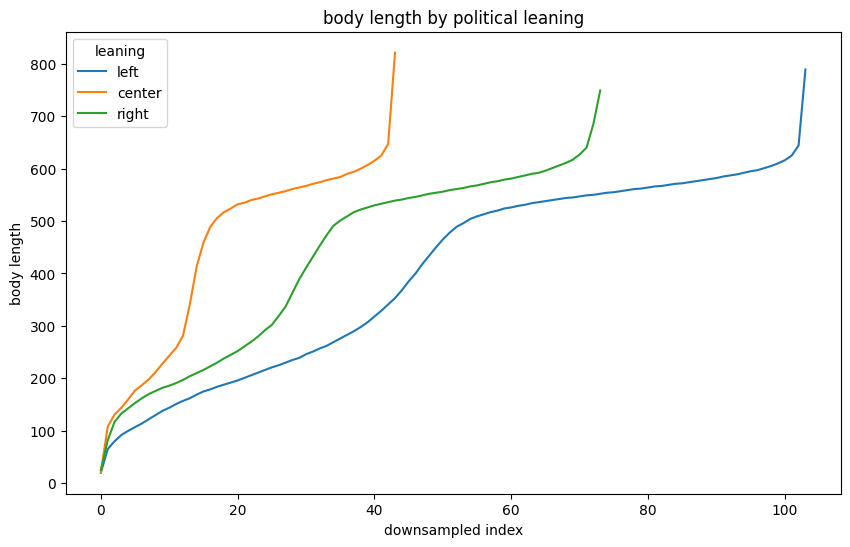

In [64]:
plt.figure(figsize=(10, 6))

for leaning in df["leaning"].unique():
    df_leaning = df[df["leaning"] == leaning]
    downsampled = pd.concat(
        # Ensuring to include the last (longest) item.
        [df_leaning["body_length"].iloc[::100], df_leaning["body_length"].tail(1)]
    ).drop_duplicates().reset_index(drop=True)
    plt.plot(downsampled, label=leaning)

plt.xlabel("downsampled index")
plt.ylabel("body length")
plt.title("body length by political leaning")
plt.legend(title="leaning")
plt.show()

In [65]:
df.to_parquet("../preprocessed/qbias.parquet")